# Global Patterns of U.S. Merchandise Exports

The United States have been a global superpower since the Second World war and has trade ties with almost all countries in the world. As of now , the US economy is the strongest in the world and every move in US economy affects the global market as a whole. For this project , we will be analyzing data procured by the NAICS(North American Industry Classification System) on exports , imports and balances of the US economy in global trade from 2002-2016.  



Here we have dataset from [Kaggle](https://www.kaggle.com/khushishahh/global-patterns-of-us-merchandise-trade) which has the info regarding Exports. We explore it to know :

* Which country/countries does the US export to most ?
* Which country/countries does the US export to least ?
* Which country/countries improved export relations over time ? 
* Which country/countries decreased export trade with the US over time ?






#Data Analysis
**PANDAS :**
 - Pandas provide high performance, fast, easy to use data structures and data analysis tools for manipulating numeric data and time series. Pandas is built on the numpy library and written in languages like Python, Cython, and C. In pandas, we can import data from various file formats like JSON, SQL, Microsoft Excel, etc. NUMPY: - It is the fundamental library of python, used to perform scientific computing. It provides high-performance multidimensional arrays and tools to deal with them. A numpy array is a grid of values (of the same type) that are indexed by a tuple of positive integers, numpy arrays are fast, easy to understand, and give users the right to perform calculations across arrays.

**NUMPY:**

 Numpy is an Python library,It is used for scientific computing in python.It contains a collection of tools and techniques that can be used to solve on computers with mathematical model of problems.
       - High performance and multi-dimensional areay objects.
       - High level mathematical functions.
       - matrices

#### Missingo :

   Missingno is a library for visualizing incompleteness in a dataset, it works on top of Matplotlib
         and Seaborn, and it’s effortless to use

         

**Data Visualizations**

Data Visualization is the graphic representation of data. It converts a huge dataset into small graphs, thus aids in data analysis and predictions

**MATPLOTLIB**

It is a Python library used for plotting graphs with the help of other libraries like Numpy and Pandas. It is a powerful tool for visualizing data in Python. It is used for creating statical interferences and plotting 2D graphs of arrays

**SEABORN:**

It is also a Python library used for plotting graphs with the help of Matplotlib, Pandas, and Numpy. It is built on the roof of Matplotlib and is considered as a superset of the Matplotlib library. It helps in visualizing univariate and bivariate data

In [ ]:
# importing libraries 
import numpy as np
import pandas as pd 
import matplotlib.pyplot as plt
import re
import seaborn as sns
import missingno as msno


# Supress Warnings
import warnings
warnings.filterwarnings('ignore')



In [ ]:
# reading the dataset
data=pd.read_csv('/content/data_exports_of_naics_total_all_merchandise.csv',encoding='utf-8')

### Data exploring 

- **head()**Understand your data using the head() function to look at the first few rows.
- **shape()**Review the dimensions of your data with the shape property.
- **info()**To know the information aboutvthe data
- **Dtyes** Look at the data types for each attribute with the dtypes property.
- **describe**Review the distribution of your data with the describe() function.
- **Correlation** Calculate pairwise correlation between your variables using the corr() function.

In [ ]:
data.head(10)

,Partner,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
0,World,6.931030e+11,7.247710e+11,8.148750e+11,9.010820e+11,1.025970e+12,1.148200e+12,1.287440e+12,1.056040e+12,1.278490e+12,1.482510e+12,1.545820e+12,1.578520e+12,1.621870e+12,1.503100e+12,1.451010e+12
1,Afghanistan,8.001107e+07,6.075889e+07,1.503915e+08,2.621532e+08,4.173938e+08,4.952837e+08,4.816334e+08,1.508593e+09,2.151401e+09,2.921862e+09,1.521555e+09,1.410116e+09,8.127209e+08,4.788142e+08,9.125566e+08
2,Albania,1.481003e+07,9.687873e+06,2.009408e+07,1.851392e+07,2.763124e+07,3.396512e+07,4.003106e+07,4.801856e+07,4.643235e+07,4.756216e+07,5.408229e+07,7.436482e+07,5.125682e+07,3.089766e+07,5.029342e+07
3,Algeria,9.844148e+08,4.873812e+08,9.715817e+08,1.106190e+09,1.101903e+09,1.652435e+09,1.243229e+09,1.107827e+09,1.194325e+09,1.596975e+09,1.363163e+09,1.848704e+09,2.616922e+09,1.875733e+09,2.191231e+09
4,Andorra,1.099390e+07,8.190542e+06,1.162538e+07,1.054947e+07,8.988508e+06,1.446389e+07,1.572347e+07,9.426362e+06,7.682080e+06,5.161272e+06,2.238367e+06,5.796907e+06,3.789433e+06,3.336817e+06,2.830268e+06
5,Angola,3.740472e+08,4.906093e+08,5.938967e+08,9.290468e+08,1.388850e+09,1.242031e+09,2.019179e+09,1.423051e+09,1.293491e+09,1.503223e+09,1.490579e+09,1.443396e+09,2.039267e+09,1.166098e+09,1.251285e+09
6,Anguilla,1.986547e+07,2.148998e+07,2.078369e+07,3.218676e+07,4.313939e+07,9.254443e+07,8.103250e+07,5.291458e+07,3.557596e+07,3.119354e+07,2.740904e+07,3.103751e+07,5.838518e+07,4.760263e+07,4.288830e+07
7,Antigua and Barbuda,8.135923e+07,1.273138e+08,1.257453e+08,1.904474e+08,1.936063e+08,2.404003e+08,1.825210e+08,1.568899e+08,1.583397e+08,1.547920e+08,2.046280e+08,1.451031e+08,2.166028e+08,6.776698e+08,2.604400e+08
8,Argentina,1.585396e+09,2.437304e+09,3.388088e+09,4.121861e+09,4.775928e+09,5.855853e+09,7.536315e+09,5.568886e+09,7.392136e+09,9.898794e+09,1.025806e+10,1.035113e+10,1.082294e+10,9.360759e+09,8.512584e+09
9,Armenia,1.118468e+08,1.027843e+08,9.065527e+07,6.548322e+07,8.036817e+07,1.106091e+08,1.514184e+08,7.709457e+07,1.134506e+08,9.431626e+07,6.429930e+07,9.122147e+07,6.041066e+07,5.024617e+07,4.357812e+07


In [ ]:
data.shape

(239, 16)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 239 entries, 0 to 238
Data columns (total 16 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   Partner  239 non-null    object 
 1   2002     239 non-null    float64
 2   2003     239 non-null    float64
 3   2004     239 non-null    float64
 4   2005     239 non-null    float64
 5   2006     239 non-null    float64
 6   2007     239 non-null    float64
 7   2008     239 non-null    float64
 8   2009     239 non-null    float64
 9   2010     239 non-null    float64
 10  2011     239 non-null    float64
 11  2012     239 non-null    float64
 12  2013     239 non-null    float64
 13  2014     239 non-null    float64
 14  2015     239 non-null    float64
 15  2016     239 non-null    float64
dtypes: float64(15), object(1)
memory usage: 30.0+ KB


It can be seen from above that some of attributes have less value than others, it shows that their are some missing values. So,lets visualize which attributes have null value.

In [ ]:
data.describe()

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
count,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02,2.390000e+02
mean,5.800027e+09,6.065031e+09,6.819036e+09,7.540437e+09,8.585514e+09,9.608362e+09,1.077357e+10,8.837167e+09,1.069868e+10,1.240594e+10,1.293574e+10,1.320936e+10,1.357215e+10,1.257825e+10,1.214235e+10
std,4.655593e+10,4.866781e+10,5.469297e+10,6.046663e+10,6.868603e+10,7.663937e+10,8.567484e+10,7.023286e+10,8.510805e+10,9.863462e+10,1.029090e+11,1.051592e+11,1.081606e+11,1.002838e+11,9.680497e+10
min,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,1.415075e+07,1.460394e+07,2.144412e+07,2.079789e+07,1.911942e+07,2.499065e+07,3.251126e+07,2.623392e+07,2.876914e+07,3.750990e+07,3.151539e+07,3.332454e+07,3.451945e+07,3.078832e+07,3.046993e+07
50%,7.810774e+07,9.147737e+07,1.181326e+08,1.242428e+08,1.465450e+08,1.761771e+08,2.534379e+08,2.060483e+08,2.113983e+08,2.853942e+08,2.656060e+08,3.088526e+08,3.314157e+08,2.597586e+08,2.604400e+08
75%,6.906302e+08,8.006763e+08,1.008830e+09,1.164941e+09,1.477790e+09,1.923317e+09,2.356083e+09,1.717195e+09,1.936273e+09,2.216543e+09,2.021565e+09,2.044201e+09,2.165219e+09,1.923121e+09,1.913729e+09
max,6.931030e+11,7.247710e+11,8.148750e+11,9.010820e+11,1.025970e+12,1.148200e+12,1.287440e+12,1.056040e+12,1.278490e+12,1.482510e+12,1.545820e+12,1.578520e+12,1.621870e+12,1.503100e+12,1.451010e+12


Another important statistical measure is data correlation. Data correlation can tell us, for example, if the data in different columns are correlated. We can use the .corr() method to get the correlation between different columns, as shown below:

In [ ]:
data.corr()

,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016
2002,1.000000,0.999924,0.999877,0.999739,0.999511,0.999078,0.998611,0.998072,0.997932,0.997646,0.997509,0.997102,0.997317,0.997059,0.996896
2003,0.999924,1.000000,0.999952,0.999870,0.999697,0.999340,0.998855,0.998347,0.998216,0.997890,0.997707,0.997347,0.997536,0.997236,0.997075
2004,0.999877,0.999952,1.000000,0.999955,0.999825,0.999503,0.999060,0.998611,0.998527,0.998234,0.998071,0.997768,0.997943,0.997637,0.997470
2005,0.999739,0.999870,0.999955,1.000000,0.999905,0.999631,0.999205,0.998775,0.998691,0.998407,0.998267,0.998000,0.998149,0.997806,0.997620
2006,0.999511,0.999697,0.999825,0.999905,1.000000,0.999870,0.999602,0.999315,0.999238,0.998988,0.998840,0.998583,0.998683,0.998379,0.998220
2007,0.999078,0.999340,0.999503,0.999631,0.999870,1.000000,0.999871,0.999625,0.999490,0.999214,0.999009,0.998733,0.998745,0.998381,0.998229
2008,0.998611,0.998855,0.999060,0.999205,0.999602,0.999871,1.000000,0.999853,0.999698,0.999530,0.999348,0.999068,0.999016,0.998685,0.998550
2009,0.998072,0.998347,0.998611,0.998775,0.999315,0.999625,0.999853,1.000000,0.999906,0.999806,0.999673,0.999468,0.999410,0.999187,0.999111
2010,0.997932,0.998216,0.998527,0.998691,0.999238,0.999490,0.999698,0.999906,1.000000,0.999927,0.999820,0.999706,0.999663,0.999434,0.999360
2011,0.997646,0.997890,0.998234,0.998407,0.998988,0.999214,0.999530,0.999806,0.999927,1.000000,0.999946,0.999857,0.999816,0.999635,0.999554


## Handling Missing Values

- There are broadly divide into two ways to treat missing values
- 1. Delete --> Delete the missing values

- 2.impute --> 
>- imputting by a simple static: Replace the missing values by another value according to MEAN,MEDIAN,MODE
>- Predictive Techniques: Use statitical models such as K-NN,SVM etc to predict and replace missing values
> fillna


- otherwise deletion is often safer and recongineed . You may loose data but will not make false predections
- Caution : Always have backup of the orginal data .if you are deleting missing values

In [ ]:
data.isnull().sum()

Partner    0
2002       0
2003       0
2004       0
2005       0
2006       0
2007       0
2008       0
2009       0
2010       0
2011       0
2012       0
2013       0
2014       0
2015       0
2016       0
dtype: int64

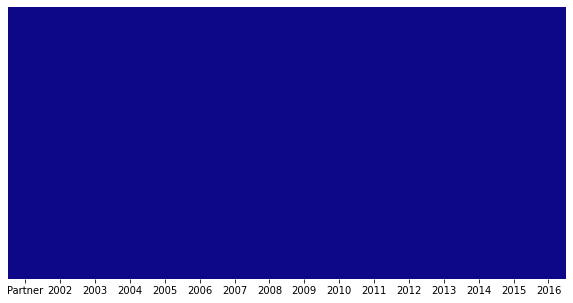

In [ ]:
#visualizing the null values for each attribute
plt.figure(figsize=(10,5)) 
sns.heatmap(data.isnull(),cmap='plasma',yticklabels=False,cbar=False)
plt.show()

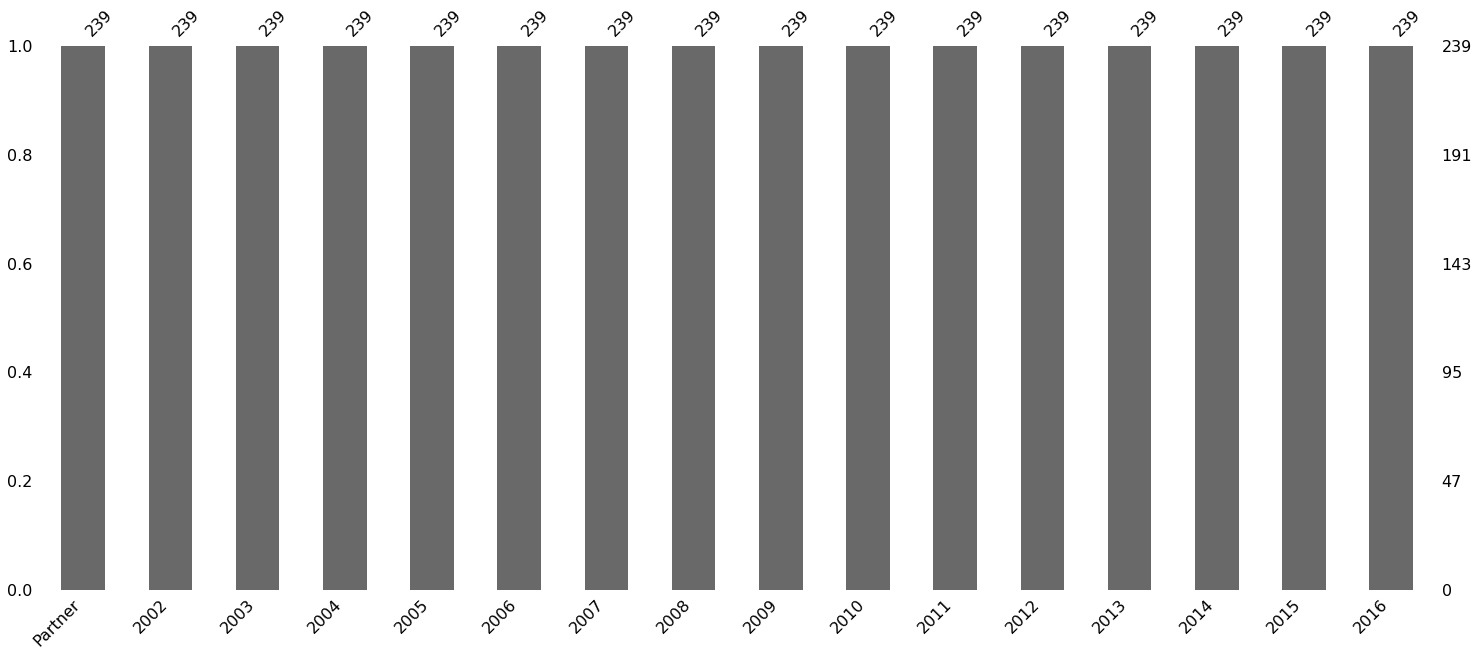

In [ ]:
msno.bar(data)
plt.show()

Now , it is safe to conclude that this dataset has no missing values and hence we do not have to go through the trouble of handling missing data. It should be noted however that this is a rarity and setting up the data for analysis usually takes longer than the actual analysis.

In [ ]:
#Analysis of Export Data
data.columns
data.info

<bound method DataFrame.info of             Partner          2002  ...          2015          2016
0             World  6.931030e+11  ...  1.503100e+12  1.451010e+12
1       Afghanistan  8.001107e+07  ...  4.788142e+08  9.125566e+08
2           Albania  1.481003e+07  ...  3.089766e+07  5.029342e+07
3           Algeria  9.844148e+08  ...  1.875733e+09  2.191231e+09
4           Andorra  1.099390e+07  ...  3.336817e+06  2.830268e+06
..              ...           ...  ...           ...           ...
234       West Bank  2.780180e+05  ...  8.597370e+05  1.169369e+06
235  Western Sahara  0.000000e+00  ...  3.211300e+04  9.398300e+04
236           Yemen  3.661100e+08  ...  1.580098e+08  1.714113e+08
237          Zambia  3.573544e+07  ...  8.417084e+07  8.163468e+07
238        Zimbabwe  4.932055e+07  ...  3.784498e+07  3.006177e+07

[239 rows x 16 columns]>

### Data cleaning
Firstly , we try to find information about the countries US has no export business with and hence will have a zero entry in the dataframe.

In [ ]:
# checking for countries with no trade relations
data['Total Export'] = data.sum(axis=1)
data

,Partner,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total Export
0,World,6.931030e+11,7.247710e+11,8.148750e+11,9.010820e+11,1.025970e+12,1.148200e+12,1.287440e+12,1.056040e+12,1.278490e+12,1.482510e+12,1.545820e+12,1.578520e+12,1.621870e+12,1.503100e+12,1.451010e+12,1.811280e+13
1,Afghanistan,8.001107e+07,6.075889e+07,1.503915e+08,2.621532e+08,4.173938e+08,4.952837e+08,4.816334e+08,1.508593e+09,2.151401e+09,2.921862e+09,1.521555e+09,1.410116e+09,8.127209e+08,4.788142e+08,9.125566e+08,1.366524e+10
2,Albania,1.481003e+07,9.687873e+06,2.009408e+07,1.851392e+07,2.763124e+07,3.396512e+07,4.003106e+07,4.801856e+07,4.643235e+07,4.756216e+07,5.408229e+07,7.436482e+07,5.125682e+07,3.089766e+07,5.029342e+07,5.676414e+08
3,Algeria,9.844148e+08,4.873812e+08,9.715817e+08,1.106190e+09,1.101903e+09,1.652435e+09,1.243229e+09,1.107827e+09,1.194325e+09,1.596975e+09,1.363163e+09,1.848704e+09,2.616922e+09,1.875733e+09,2.191231e+09,2.134202e+10
4,Andorra,1.099390e+07,8.190542e+06,1.162538e+07,1.054947e+07,8.988508e+06,1.446389e+07,1.572347e+07,9.426362e+06,7.682080e+06,5.161272e+06,2.238367e+06,5.796907e+06,3.789433e+06,3.336817e+06,2.830268e+06,1.207967e+08
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,West Bank,2.780180e+05,4.793250e+05,2.383570e+05,3.720993e+06,2.272497e+06,1.300929e+07,2.902520e+05,6.207930e+05,7.144020e+05,1.145816e+06,1.521509e+06,8.945270e+05,1.755072e+06,8.597370e+05,1.169369e+06,2.896996e+07
235,Western Sahara,0.000000e+00,2.811200e+04,2.260300e+04,2.865600e+04,1.606300e+04,3.444420e+05,9.113200e+04,1.585690e+05,5.390200e+04,3.113100e+04,5.885000e+04,1.560760e+05,2.769870e+05,3.211300e+04,9.398300e+04,1.392619e+06
236,Yemen,3.661100e+08,1.914000e+08,2.323357e+08,2.190485e+08,2.549253e+08,6.420869e+08,4.014638e+08,3.811316e+08,3.977657e+08,3.897450e+08,4.694663e+08,5.182519e+08,3.688987e+08,1.580098e+08,1.714113e+08,5.162051e+09
237,Zambia,3.573544e+07,1.946046e+07,2.639940e+07,2.911311e+07,5.163365e+07,6.939493e+07,7.870432e+07,5.727329e+07,5.641513e+07,1.297846e+08,1.467888e+08,1.411488e+08,1.141219e+08,8.417084e+07,8.163468e+07,1.121779e+09


From this updated database , we select and remove countries with Total Export = 0

In [ ]:
#checking how many 0 values are there in `Total` attribute
zero_export=data[data['Total Export']==0]
print(zero_export)

         Partner  2002  2003  2004  2005  ...  2013  2014  2015  2016  Total Export
62  East Germany   0.0   0.0   0.0   0.0  ...   0.0   0.0   0.0   0.0           0.0

[1 rows x 17 columns]


Since this entry is of no meaning to the database , we remove this row.

In [ ]:
#removing row with no entry
data = data.drop(data.index[62])
#data = data.drop([labels= "62"] ,axis=0, inplace=True)
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 238 entries, 0 to 238
Data columns (total 17 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Partner       238 non-null    object 
 1   2002          238 non-null    float64
 2   2003          238 non-null    float64
 3   2004          238 non-null    float64
 4   2005          238 non-null    float64
 5   2006          238 non-null    float64
 6   2007          238 non-null    float64
 7   2008          238 non-null    float64
 8   2009          238 non-null    float64
 9   2010          238 non-null    float64
 10  2011          238 non-null    float64
 11  2012          238 non-null    float64
 12  2013          238 non-null    float64
 13  2014          238 non-null    float64
 14  2015          238 non-null    float64
 15  2016          238 non-null    float64
 16  Total Export  238 non-null    float64
dtypes: float64(16), object(1)
memory usage: 33.5+ KB


Now , we try and answer the first two questions i.e ,

-Which country/countries does the US export to most ?

-Which country/countries does the US export to least ?

For that , we can use the "Total Export" attribute and sorting 

In [ ]:
# Sorting Dataframe based on Export Value

top_exports = data.sort_values(by=['Total Export'] , ascending = False)
top_exports

,Partner,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total Export,Percent Change in trade volume
0,World,6.931030e+11,7.247710e+11,8.148750e+11,9.010820e+11,1.025970e+12,1.148200e+12,1.287440e+12,1.056040e+12,1.278490e+12,1.482510e+12,1.545820e+12,1.578520e+12,1.621870e+12,1.503100e+12,1.451010e+12,1.811280e+13,109.35
38,Canada,1.609230e+11,1.699240e+11,1.898800e+11,2.118990e+11,2.306560e+11,2.488880e+11,2.611500e+11,2.046580e+11,2.492560e+11,2.812920e+11,2.926510e+11,3.007550e+11,3.128170e+11,2.808550e+11,2.667970e+11,3.662401e+12,65.7917
138,Mexico,9.747027e+10,9.741179e+10,1.107310e+11,1.202480e+11,1.337220e+11,1.359180e+11,1.512200e+11,1.288920e+11,1.636650e+11,1.982890e+11,2.158750e+11,2.259540e+11,2.410070e+11,2.362040e+11,2.297020e+11,2.486309e+12,135.664
44,China,2.212779e+10,2.836794e+10,3.442777e+10,4.119201e+10,5.367301e+10,6.293689e+10,6.973284e+10,6.949668e+10,9.191108e+10,1.041220e+11,1.105170e+11,1.217460e+11,1.236570e+11,1.159320e+11,1.156020e+11,1.165442e+12,422.429
108,Japan,5.144930e+10,5.200428e+10,5.356869e+10,5.468058e+10,5.845898e+10,6.115958e+10,6.514175e+10,5.113418e+10,6.047185e+10,6.579974e+10,6.997579e+10,6.523741e+10,6.689184e+10,6.239310e+10,6.323627e+10,9.016033e+11,22.9099
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
157,Niue,3.325950e+05,6.180300e+04,6.132850e+05,6.076430e+05,2.540329e+06,1.662323e+06,5.096620e+05,1.209612e+06,1.570975e+06,7.161690e+05,7.717480e+05,2.490640e+05,1.115640e+05,7.137100e+04,7.580300e+04,1.110395e+07,-77.2086
81,Gaza Strip,1.806900e+04,1.840000e+04,2.875400e+04,2.311200e+05,2.669200e+05,4.634860e+06,6.118300e+04,2.282300e+04,1.830513e+06,4.729700e+04,1.051650e+05,1.781380e+05,1.690400e+05,1.839340e+05,1.698430e+05,7.966059e+06,839.969
233,Wallis and Futuna,2.410660e+05,5.521360e+05,1.685660e+05,4.087370e+05,1.780500e+05,2.125450e+05,7.069100e+05,5.354970e+05,7.781320e+05,3.388970e+05,6.022400e+05,6.375350e+05,3.502130e+05,3.768410e+05,2.251560e+05,6.312521e+06,-6.59985
222,Tuvalu,7.012800e+04,7.657200e+04,3.223760e+05,4.246000e+04,6.429000e+04,5.151200e+04,1.304230e+05,1.517840e+05,6.209450e+05,7.241610e+05,6.121460e+05,5.602600e+05,5.919000e+05,6.256360e+05,1.139541e+06,5.784134e+06,1524.94


From this dataframe , it is clear that Canada is the largest exports market for the United States , followed by Mexico and China. 
This answers our first question.

In [ ]:
#Second Question 
data.sort_values(by=['Total Export'])

,Partner,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total Export
235,Western Sahara,0.000000e+00,2.811200e+04,2.260300e+04,2.865600e+04,1.606300e+04,3.444420e+05,9.113200e+04,1.585690e+05,5.390200e+04,3.113100e+04,5.885000e+04,1.560760e+05,2.769870e+05,3.211300e+04,9.398300e+04,1.392619e+06
181,Saint Pierre and Miquelon,8.013290e+05,8.454400e+04,6.521070e+05,9.800310e+05,4.466100e+05,2.215530e+05,4.007950e+05,1.351330e+05,1.469100e+04,1.185590e+05,1.798520e+05,2.616290e+05,4.364000e+03,2.274590e+05,6.246000e+04,4.591116e+06
222,Tuvalu,7.012800e+04,7.657200e+04,3.223760e+05,4.246000e+04,6.429000e+04,5.151200e+04,1.304230e+05,1.517840e+05,6.209450e+05,7.241610e+05,6.121460e+05,5.602600e+05,5.919000e+05,6.256360e+05,1.139541e+06,5.784134e+06
233,Wallis and Futuna,2.410660e+05,5.521360e+05,1.685660e+05,4.087370e+05,1.780500e+05,2.125450e+05,7.069100e+05,5.354970e+05,7.781320e+05,3.388970e+05,6.022400e+05,6.375350e+05,3.502130e+05,3.768410e+05,2.251560e+05,6.312521e+06
81,Gaza Strip,1.806900e+04,1.840000e+04,2.875400e+04,2.311200e+05,2.669200e+05,4.634860e+06,6.118300e+04,2.282300e+04,1.830513e+06,4.729700e+04,1.051650e+05,1.781380e+05,1.690400e+05,1.839340e+05,1.698430e+05,7.966059e+06
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
108,Japan,5.144930e+10,5.200428e+10,5.356869e+10,5.468058e+10,5.845898e+10,6.115958e+10,6.514175e+10,5.113418e+10,6.047185e+10,6.579974e+10,6.997579e+10,6.523741e+10,6.689184e+10,6.239310e+10,6.323627e+10,9.016033e+11
44,China,2.212779e+10,2.836794e+10,3.442777e+10,4.119201e+10,5.367301e+10,6.293689e+10,6.973284e+10,6.949668e+10,9.191108e+10,1.041220e+11,1.105170e+11,1.217460e+11,1.236570e+11,1.159320e+11,1.156020e+11,1.165442e+12
138,Mexico,9.747027e+10,9.741179e+10,1.107310e+11,1.202480e+11,1.337220e+11,1.359180e+11,1.512200e+11,1.288920e+11,1.636650e+11,1.982890e+11,2.158750e+11,2.259540e+11,2.410070e+11,2.362040e+11,2.297020e+11,2.486309e+12
38,Canada,1.609230e+11,1.699240e+11,1.898800e+11,2.118990e+11,2.306560e+11,2.488880e+11,2.611500e+11,2.046580e+11,2.492560e+11,2.812920e+11,2.926510e+11,3.007550e+11,3.128170e+11,2.808550e+11,2.667970e+11,3.662401e+12


From this dataframe , it can be concluded that US exports the least to Western Sahara , Saint Pierre and Miquelon and Tuvalu.

This answers our second question


**Third Question..**

Which country/countries improved export relations over time ?

For this , we find the difference of funding between 2016 and 2002 and compare it with 2002 values for a percentage answer. 

In [ ]:
#which countries improved trade relations ?
change_in_trade = data["2016"]-data["2002"]
change_in_trade

0      7.579070e+11
1      8.325455e+08
2      3.548338e+07
3      1.206817e+09
4     -8.163633e+06
           ...     
234    8.913510e+05
235    9.398300e+04
236   -1.946987e+08
237    4.589925e+07
238   -1.925878e+07
Length: 238, dtype: float64

In [ ]:
#converting into percentage 
relative_change = change_in_trade/data["2002"]
percent_change = relative_change * 100
relative_change
percent_change

0       109.349837
1      1040.537890
2       239.590139
3       122.592278
4       -74.256017
          ...     
234     320.609097
235            inf
236     -53.180389
237     128.441814
238     -39.048180
Length: 238, dtype: float64

In [ ]:
#Inserting new column 
data['Percent Change in trade volume'] = percent_change
data

,Partner,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total Export,Percent Change in trade volume
0,World,6.931030e+11,7.247710e+11,8.148750e+11,9.010820e+11,1.025970e+12,1.148200e+12,1.287440e+12,1.056040e+12,1.278490e+12,1.482510e+12,1.545820e+12,1.578520e+12,1.621870e+12,1.503100e+12,1.451010e+12,1.811280e+13,109.349837
1,Afghanistan,8.001107e+07,6.075889e+07,1.503915e+08,2.621532e+08,4.173938e+08,4.952837e+08,4.816334e+08,1.508593e+09,2.151401e+09,2.921862e+09,1.521555e+09,1.410116e+09,8.127209e+08,4.788142e+08,9.125566e+08,1.366524e+10,1040.537890
2,Albania,1.481003e+07,9.687873e+06,2.009408e+07,1.851392e+07,2.763124e+07,3.396512e+07,4.003106e+07,4.801856e+07,4.643235e+07,4.756216e+07,5.408229e+07,7.436482e+07,5.125682e+07,3.089766e+07,5.029342e+07,5.676414e+08,239.590139
3,Algeria,9.844148e+08,4.873812e+08,9.715817e+08,1.106190e+09,1.101903e+09,1.652435e+09,1.243229e+09,1.107827e+09,1.194325e+09,1.596975e+09,1.363163e+09,1.848704e+09,2.616922e+09,1.875733e+09,2.191231e+09,2.134202e+10,122.592278
4,Andorra,1.099390e+07,8.190542e+06,1.162538e+07,1.054947e+07,8.988508e+06,1.446389e+07,1.572347e+07,9.426362e+06,7.682080e+06,5.161272e+06,2.238367e+06,5.796907e+06,3.789433e+06,3.336817e+06,2.830268e+06,1.207967e+08,-74.256017
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
234,West Bank,2.780180e+05,4.793250e+05,2.383570e+05,3.720993e+06,2.272497e+06,1.300929e+07,2.902520e+05,6.207930e+05,7.144020e+05,1.145816e+06,1.521509e+06,8.945270e+05,1.755072e+06,8.597370e+05,1.169369e+06,2.896996e+07,320.609097
235,Western Sahara,0.000000e+00,2.811200e+04,2.260300e+04,2.865600e+04,1.606300e+04,3.444420e+05,9.113200e+04,1.585690e+05,5.390200e+04,3.113100e+04,5.885000e+04,1.560760e+05,2.769870e+05,3.211300e+04,9.398300e+04,1.392619e+06,inf
236,Yemen,3.661100e+08,1.914000e+08,2.323357e+08,2.190485e+08,2.549253e+08,6.420869e+08,4.014638e+08,3.811316e+08,3.977657e+08,3.897450e+08,4.694663e+08,5.182519e+08,3.688987e+08,1.580098e+08,1.714113e+08,5.162051e+09,-53.180389
237,Zambia,3.573544e+07,1.946046e+07,2.639940e+07,2.911311e+07,5.163365e+07,6.939493e+07,7.870432e+07,5.727329e+07,5.641513e+07,1.297846e+08,1.467888e+08,1.411488e+08,1.141219e+08,8.417084e+07,8.163468e+07,1.121779e+09,128.441814


In [ ]:
#now we sort the data according to percent change in trade volume
data.sort_values(by=['Percent Change in trade volume'] , ascending = False)



,Partner,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total Export,Percent Change in trade volume
193,Sint Maarten,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,3.976781e+08,702440846.0,828898068.0,777566086.0,741204275.0,711499452.0,4.159287e+09,inf
113,Kosovo,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.002266e+06,1.118304e+07,1.557212e+07,20832234.0,14544129.0,16343893.0,19743318.0,18355903.0,1.215769e+08,inf
54,Curacao,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,4.842010e+08,691942132.0,687514148.0,611598106.0,521257313.0,876892293.0,3.873405e+09,inf
143,Montenegro,0.0,0.0,0.0,0.000000e+00,0.000000e+00,4.530606e+07,5.318550e+07,3.478787e+07,1.455480e+07,1.767301e+07,12397402.0,21683955.0,18179413.0,11133957.0,16711327.0,2.456133e+08,inf
200,South Sudan,0.0,0.0,0.0,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,7.361905e+06,32540784.0,13417224.0,46148430.0,19613532.0,9739895.0,1.288218e+08,inf
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Other Countries,187100846.0,185711004.0,223996560.0,2.162833e+08,1.243854e+08,4.412086e+08,1.829974e+08,2.337389e+08,3.758980e+08,2.253877e+08,175000278.0,179871109.0,101833.0,0.0,1771484.0,2.753452e+09,-99.053193
170,Pitcairn Islands,6082742.0,3031593.0,2369109.0,4.562900e+05,1.365209e+06,1.894797e+06,0.000000e+00,5.682120e+05,3.683000e+03,1.569600e+04,40527.0,0.0,55591.0,17405.0,51658.0,1.595251e+07,-99.150745
159,North Korea,25012257.0,7977400.0,23750195.0,5.757048e+06,0.000000e+00,1.728160e+06,5.215123e+07,8.567930e+05,2.867073e+06,9.405834e+06,11952220.0,6582817.0,24028661.0,4751721.0,139334.0,1.769607e+08,-99.442937
151,Netherlands Antilles,741406792.0,746857272.0,824200356.0,1.137634e+09,1.485066e+09,2.082020e+09,2.951626e+09,2.055810e+09,2.943155e+09,1.187093e+09,0.0,0.0,0.0,0.0,0.0,1.615487e+10,-100.000000


A percent change of "Infinity" suggests that the initial value was zero. i.e , US had no trade relations with those countries in 2002 and currently has trade relationship. We replace infinity with the replace method .

In [ ]:
data.replace([np.inf, -np.inf], "Trade started after 2002", inplace=True)

In [ ]:
data.loc[data['Percent Change in trade volume']=="Trade started after 2002"]

,Partner,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total Export,Percent Change in trade volume
54,Curacao,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,484200988.0,691942132.0,687514148.0,611598106.0,521257313.0,876892293.0,3.873405e+09,Trade started after 2002
113,Kosovo,0.0,0.0,0.0,0.0,0.0,0.0,0.0,5002266.0,11183045.0,15572116.0,20832234.0,14544129.0,16343893.0,19743318.0,18355903.0,1.215769e+08,Trade started after 2002
143,Montenegro,0.0,0.0,0.0,0.0,0.0,45306063.0,53185501.0,34787868.0,14554803.0,17673009.0,12397402.0,21683955.0,18179413.0,11133957.0,16711327.0,2.456133e+08,Trade started after 2002
188,Serbia,0.0,0.0,0.0,0.0,0.0,109583090.0,207357458.0,112594021.0,104469213.0,126632272.0,127658133.0,141973440.0,135035904.0,126269420.0,145142099.0,1.336715e+09,Trade started after 2002
193,Sint Maarten,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,397678059.0,702440846.0,828898068.0,777566086.0,741204275.0,711499452.0,4.159287e+09,Trade started after 2002
200,South Sudan,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,7361905.0,32540784.0,13417224.0,46148430.0,19613532.0,9739895.0,1.288218e+08,Trade started after 2002
235,Western Sahara,0.0,28112.0,22603.0,28656.0,16063.0,344442.0,91132.0,158569.0,53902.0,31131.0,58850.0,156076.0,276987.0,32113.0,93983.0,1.392619e+06,Trade started after 2002


From this dataframe , it is clear that Curacao , Kosovo , Montenegro , Serbia , Sint Maarten , South Sudan and Western Sahara improved their trade relations with the US most , compared to 2002 levels. However , these countries came out first only because they had no trade relations to compare with. Now we'll figure out which country with a pre established trade realtionship improved the most.



In [ ]:
#Dropping countries who started to train after 2002
data = data[data['Percent Change in trade volume'] != 'Trade started after 2002'] 
data.sort_values(by=['Percent Change in trade volume'] , ascending = False)

,Partner,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total Export,Percent Change in trade volume
137,Mayotte,14569.0,0.0,270439.0,0.000000e+00,1.172400e+04,2.431190e+05,5.781400e+04,1.168097e+06,6.282489e+06,4.572023e+06,1.161014e+07,8.520110e+06,1.208747e+07,5.697333e+06,2.829427e+06,5.336476e+07,19320.9
174,Reunion,2318566.0,2147091.0,2619765.0,3.785910e+06,4.378145e+06,4.753124e+06,8.446395e+06,9.448244e+06,8.214437e+06,1.548829e+08,7.566899e+06,8.774205e+06,1.107232e+07,6.905271e+06,4.495595e+08,6.848728e+08,19289.5
85,Gibraltar,25741728.0,14036146.0,137890900.0,1.632576e+08,2.861917e+08,5.939456e+08,2.640684e+09,1.086961e+09,1.494145e+09,3.148591e+09,5.109058e+09,3.576398e+09,2.530894e+09,1.979388e+09,1.683639e+09,2.447082e+10,6440.51
103,Iraq,31607458.0,309895407.0,856451848.0,1.373986e+09,1.490615e+09,1.560201e+09,2.069789e+09,1.772408e+09,1.643064e+09,2.400365e+09,2.053842e+09,2.003375e+09,2.105888e+09,1.970509e+09,1.266381e+09,2.290838e+10,3906.59
33,Burma (Myanmar),10140644.0,6864449.0,11699649.0,5.464172e+06,7.541563e+06,8.709851e+06,1.075567e+07,6.906838e+06,9.650957e+06,4.894988e+07,6.576594e+07,1.458306e+08,9.285641e+07,2.271630e+08,1.928921e+08,8.511918e+08,1802.17
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
162,Other Countries,187100846.0,185711004.0,223996560.0,2.162833e+08,1.243854e+08,4.412086e+08,1.829974e+08,2.337389e+08,3.758980e+08,2.253877e+08,1.750003e+08,1.798711e+08,1.018330e+05,0.000000e+00,1.771484e+06,2.753452e+09,-99.0532
170,Pitcairn Islands,6082742.0,3031593.0,2369109.0,4.562900e+05,1.365209e+06,1.894797e+06,0.000000e+00,5.682120e+05,3.683000e+03,1.569600e+04,4.052700e+04,0.000000e+00,5.559100e+04,1.740500e+04,5.165800e+04,1.595251e+07,-99.1507
159,North Korea,25012257.0,7977400.0,23750195.0,5.757048e+06,0.000000e+00,1.728160e+06,5.215123e+07,8.567930e+05,2.867073e+06,9.405834e+06,1.195222e+07,6.582817e+06,2.402866e+07,4.751721e+06,1.393340e+05,1.769607e+08,-99.4429
151,Netherlands Antilles,741406792.0,746857272.0,824200356.0,1.137634e+09,1.485066e+09,2.082020e+09,2.951626e+09,2.055810e+09,2.943155e+09,1.187093e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.615487e+10,-100


From this dataframe , it is clear that **Mayotte** and **Reunion** improved trade volume approximately 190 times , as compared to 2002 levels 
.

This answers our third question.

**Final question:**

Which country/countries decreased export trade with the US over time ?


In [ ]:
#we sort the previous dataframe in an ascending manner to quickly answer the question.
data.sort_values(by=['Percent Change in trade volume'] )

,Partner,2002,2003,2004,2005,2006,2007,2008,2009,2010,2011,2012,2013,2014,2015,2016,Total Export,Percent Change in trade volume
189,Serbia and Montenegro,78107743.0,49937003.0,142933461.0,1.324963e+08,1.471427e+08,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,5.506172e+08,-100
151,Netherlands Antilles,741406792.0,746857272.0,824200356.0,1.137634e+09,1.485066e+09,2.082020e+09,2.951626e+09,2.055810e+09,2.943155e+09,1.187093e+09,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,1.615487e+10,-100
159,North Korea,25012257.0,7977400.0,23750195.0,5.757048e+06,0.000000e+00,1.728160e+06,5.215123e+07,8.567930e+05,2.867073e+06,9.405834e+06,1.195222e+07,6.582817e+06,2.402866e+07,4.751721e+06,1.393340e+05,1.769607e+08,-99.4429
170,Pitcairn Islands,6082742.0,3031593.0,2369109.0,4.562900e+05,1.365209e+06,1.894797e+06,0.000000e+00,5.682120e+05,3.683000e+03,1.569600e+04,4.052700e+04,0.000000e+00,5.559100e+04,1.740500e+04,5.165800e+04,1.595251e+07,-99.1507
162,Other Countries,187100846.0,185711004.0,223996560.0,2.162833e+08,1.243854e+08,4.412086e+08,1.829974e+08,2.337389e+08,3.758980e+08,2.253877e+08,1.750003e+08,1.798711e+08,1.018330e+05,0.000000e+00,1.771484e+06,2.753452e+09,-99.0532
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
33,Burma (Myanmar),10140644.0,6864449.0,11699649.0,5.464172e+06,7.541563e+06,8.709851e+06,1.075567e+07,6.906838e+06,9.650957e+06,4.894988e+07,6.576594e+07,1.458306e+08,9.285641e+07,2.271630e+08,1.928921e+08,8.511918e+08,1802.17
103,Iraq,31607458.0,309895407.0,856451848.0,1.373986e+09,1.490615e+09,1.560201e+09,2.069789e+09,1.772408e+09,1.643064e+09,2.400365e+09,2.053842e+09,2.003375e+09,2.105888e+09,1.970509e+09,1.266381e+09,2.290838e+10,3906.59
85,Gibraltar,25741728.0,14036146.0,137890900.0,1.632576e+08,2.861917e+08,5.939456e+08,2.640684e+09,1.086961e+09,1.494145e+09,3.148591e+09,5.109058e+09,3.576398e+09,2.530894e+09,1.979388e+09,1.683639e+09,2.447082e+10,6440.51
174,Reunion,2318566.0,2147091.0,2619765.0,3.785910e+06,4.378145e+06,4.753124e+06,8.446395e+06,9.448244e+06,8.214437e+06,1.548829e+08,7.566899e+06,8.774205e+06,1.107232e+07,6.905271e+06,4.495595e+08,6.848728e+08,19289.5


From this dataframe , It is evident that **Serbia and Montenegro** along with **Netherlands Antilles** has stopped export relations altogether with the US in 2016 .



---
Among countries who still traded with the US in 2016 , it can be seen that

 **NORTH KOREA** has decreased taking exports from US by **99.4429%**

 and this answers our fourth question too...


# Helpful Visualizations:


We sort our data on the basis of total export value and use barplots to show the comparitive differences between the top 10 export nations.

**BARPLOT**

In [ ]:
#selecting the top 10 export nations 
top_ten_exports = top_exports[1:11]
top_ten = top_ten_exports[["Partner","Total Export"]]
top_ten

,Partner,Total Export
38,Canada,3.662401e+12
138,Mexico,2.486309e+12
44,China,1.165442e+12
108,Japan,9.016033e+11
226,United Kingdom,7.081589e+11
83,Germany,6.517948e+11
199,South Korea,5.269649e+11
150,Netherlands,5.085755e+11
27,Brazil,4.247912e+11
75,France,3.946259e+11


Now , we plot a bargraph for comparitive visual analysis of top 10 exports


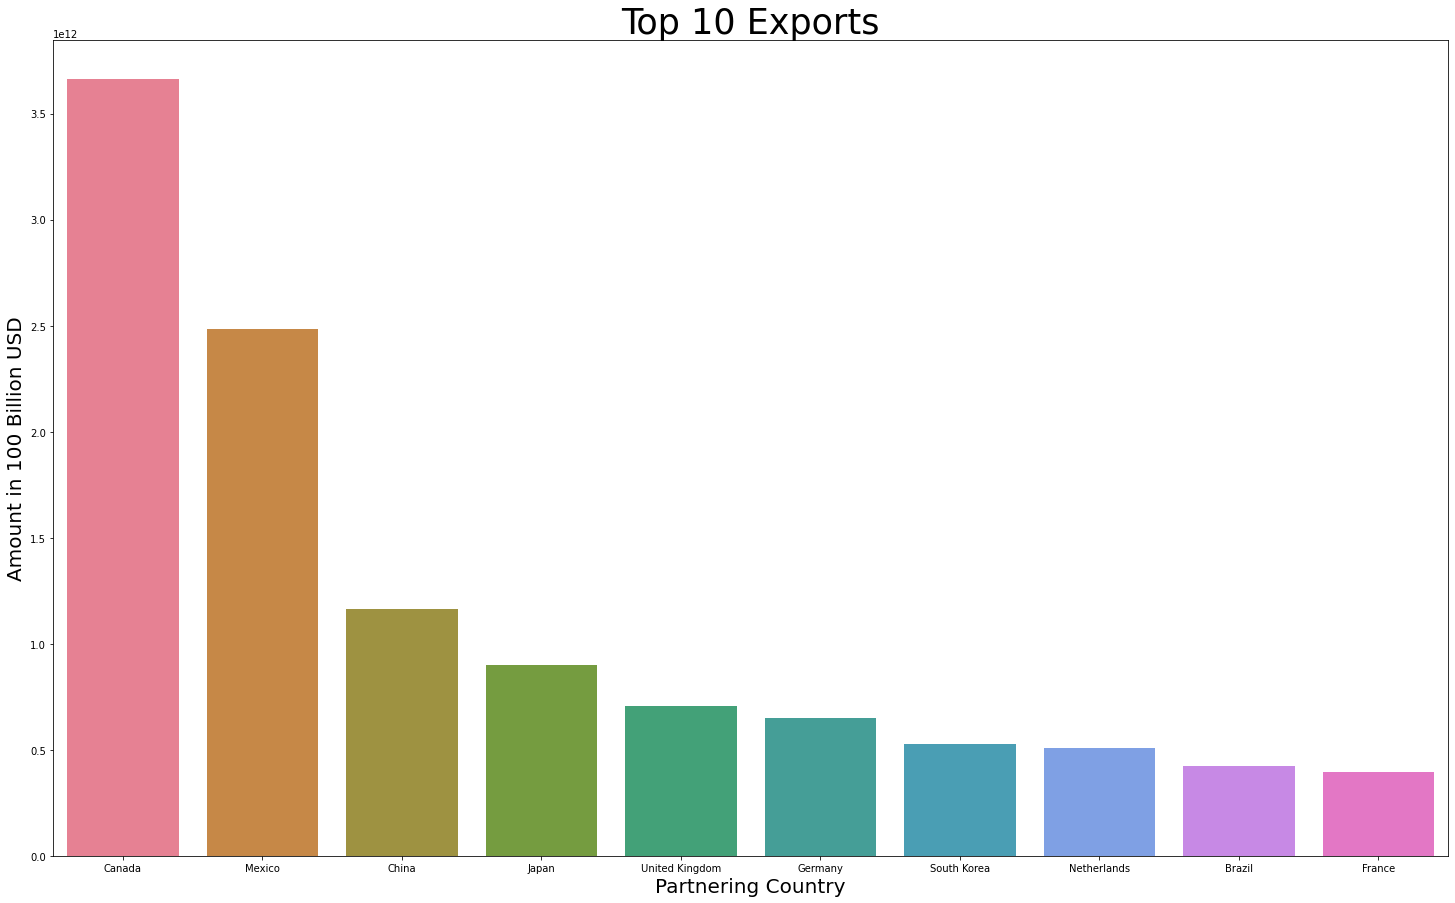

In [ ]:
## visualising the amount spend on the top 50 startups
plt.figure(figsize=(25,15))
ax = sns.barplot(x="Partner", y="Total Export",data=top_ten, palette="husl",linewidth = 2,label='big')
plt.title("Top 10 Exports",fontsize=35)
ax.set_xlabel(xlabel = 'Partnering Country', fontsize = 20)
ax.set_ylabel(ylabel = 'Amount in 100 Billion USD', fontsize = 20)
plt.show()


From this bar graph , it can be concluded that Canada is the single largest export Partner for the United States. To put this in comparison of a whole , we plot a pie chart for the TOP TEN EXPORTS. 
Usually , plotting pie charts for more than 4 or 5 values is not good data visualisation etiquette . However in this case it is for comparing 1 specific value with multiple others and hence pie charts can be helpful in that.

**PIE CHART**

array([<matplotlib.axes._subplots.AxesSubplot object at 0x7ff6e2a1fe10>],
      dtype=object)

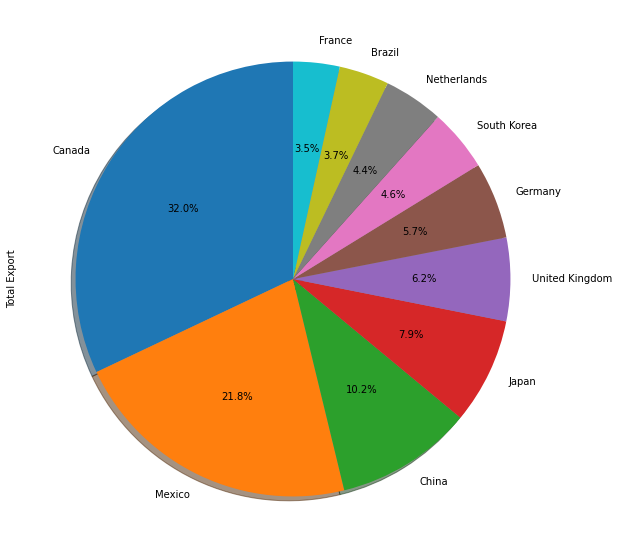

In [ ]:
#Plotting a pie chart and labelling the values.
top_ten.plot(kind='pie', y='Total Export', subplots=True, shadow = True,startangle=90,labels=top_ten['Partner'], legend = False,
figsize=(15,10), autopct='%1.1f%%')

**CANADA** has the lion's share for US export markets at almost one-third of all US exports reaching Canada. 

Canada is followed by Mexico and from the pie chart , it is rather obvious that **Canada and Mexico** alone make up **51% of total export market** for the United States. 

This could be attributed to proximity , ease of transport and in the case of Canada , a rather friendly International border it shares with the US.

Now , let's a plot a time series to analyse US-Canada export behavior from 2002-2016. 

Time series plots are best used in analysing trends over time.

**TIME SERIES PLOT**

In [ ]:
canada_data = data.loc[data['Partner'] == 'Canada']
canada_data.T


,38
Partner,Canada
2002,1.60923e+11
2003,1.69924e+11
2004,1.8988e+11
2005,2.11899e+11
2006,2.30656e+11
2007,2.48888e+11
2008,2.6115e+11
2009,2.04658e+11
2010,2.49256e+11


In [ ]:
years=['2002','2003','2004','2005','2006','2007','2008','2009','2010','2011','2012','2013','2014','2015','2016']
export=['1.609230e+11',	'1.699240e+11',	'1.898800e+11',	'2.118990e+11',	'2.306560e+11',	'2.488880e+11',	'2.611500e+11',	'2.046580e+11',	'2.492560e+11',	'2.812920e+11',	'2.926510e+11',	'3.007550e+11',	'3.128170e+11',	'2.808550e+11','2.66797e+11'	]
canada_trade=pd.DataFrame({'Year': years, 'Export Value': export})
canada_trade

,Year,Export Value
0,2002,1.609230e+11
1,2003,1.699240e+11
2,2004,1.898800e+11
3,2005,2.118990e+11
4,2006,2.306560e+11
5,2007,2.488880e+11
6,2008,2.611500e+11
7,2009,2.046580e+11
8,2010,2.492560e+11
9,2011,2.812920e+11


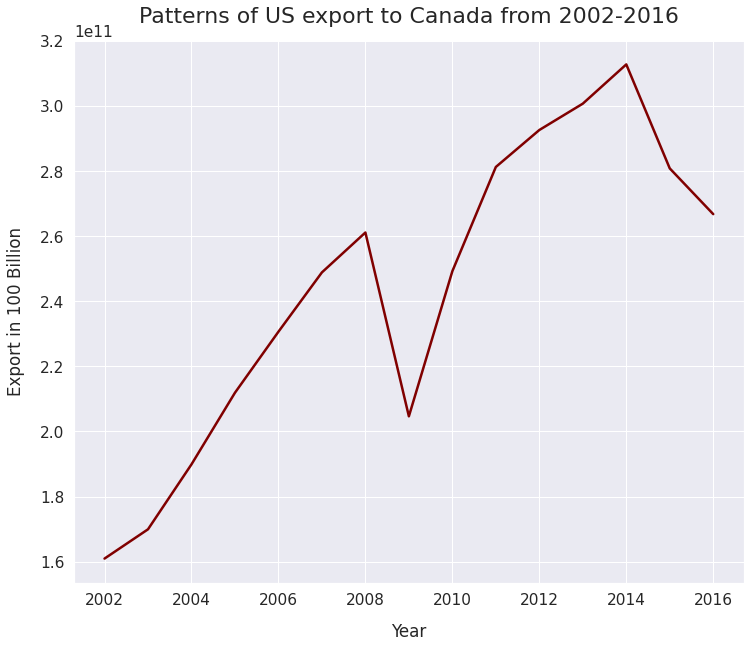

In [ ]:
#Plotting a style plot
canada_trade=canada_trade.astype(float)
sns.set(font_scale=1.4)
canada_trade.set_index('Year')['Export Value'].plot(figsize=(12, 10), linewidth=2.5, color='maroon')
plt.xlabel("Year", labelpad=15)
plt.ylabel("Export in 100 Billion", labelpad=15)
plt.title("Patterns of US export to Canada from 2002-2016", y=1.02, fontsize=22);

From the graph , It can be concluded that US-Canada export relations has improved over time ,till 2014 except for a dip in 2009 .

Post 2014 , it appears as if the export volume has decreased in the subsequent 2 years. Nevertheless, Canada still is the most important export market for US in terms of trade volume.


Adharsh Tom